<div dir = "rtl" style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته دوازدهم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

In [4]:
# import all packages and libraries here.
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics, svm, linear_model , model_selection, preprocessing, pipeline, impute, compose

# 1- State with reasons whether the following sentences are true or false?

<ul style="font-size:25px">
    <li>
        SVMs are not suitable for large datasets.
    </li>
    <li>
       SVMs perform poorly in imbalanced datasets.
    </li>
     <li>
        SVMs perform poorly when there is just too much noise in the data.
    </li>
</ul>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ۲- دیتاست lsvt-voice-rehabilitation را از لینک زیر دانلود کنید و به سوالات زیر حواب دهید. در این تمرین مجاز به استفاده از کتابخانه scikit-learn می باشید.
		</br>
</div>
		https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 الف- داده ها را به روشهای زیر دسته بندی کنید (حواستان باشد که داده ها را قبل از اعمال به مدل، نرمالایز کنید).
        <ul>
            <li>
            کرنل خطی
            </li>
            <li>
            کرنل چندجمله ای (پارامترهای r, d)
            </li>
            <li>
            کرنل rbf - پارامتر گاما
            </li>
            <li>
            سیگمویید - پارامتر r
            </li>           
         </ul>
</div

In [74]:
def get_metrics(y_tester, y_predictor):
    print('classification_report = \n',metrics.classification_report(y_test,y_predict))

In [75]:
df_1 = pd.read_excel('../../datasets/lsvt+voice+rehabilitation/LSVT_voice_rehabilitation.xlsx', sheet_name= 'Data' )
df_2 = pd.read_excel('../../datasets/lsvt+voice+rehabilitation/LSVT_voice_rehabilitation.xlsx', sheet_name= 'Binary response')
df_3 = pd.read_excel('../../datasets/lsvt+voice+rehabilitation/LSVT_voice_rehabilitation.xlsx', sheet_name= 'Subject demographics')
df = pd.concat([df_1,df_2,df_3],axis=1,)
df.describe()

,Jitter->F0_abs_dif,Jitter->F0_dif_percent,Jitter->F0_PQ5_classical_Schoentgen,Jitter->F0_PQ5_classical_Baken,Jitter->F0_PQ5_generalised_Schoentgen,Jitter->F0_abs0th_perturb,Jitter->F0_CV,Jitter->F0_TKEO_mean,Jitter->F0_TKEO_std,Jitter->F0_TKEO_prc5,...,det_TKEO_std4_5_coef,det_TKEO_std4_6_coef,det_TKEO_std4_7_coef,det_TKEO_std4_8_coef,det_TKEO_std4_9_coef,det_TKEO_std4_10_coef,"Binary class 1=acceptable, 2=unacceptable",Subject_index,Age,"Gender, 0->Male, 1->Female"
count,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.000000,1.260000e+02,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.225683,0.119056,0.001385,-6.951801e-07,0.001061,6.937604,1.660453e-04,82.190214,1796.302230,-39.411240,...,143.774055,370.528329,912.494576,2116.358203,4649.660947,9813.389954,1.666667,8.357143,61.928571,0.428571
std,0.345839,0.180097,0.002124,1.573954e-05,0.001836,24.275232,8.712998e-04,106.894449,1631.244809,98.188655,...,20.468616,52.836331,129.246368,296.400010,653.497584,1365.084335,0.473286,4.927416,6.252268,0.496847
min,0.020443,0.013830,0.000159,-5.832686e-05,0.000060,0.548917,7.679846e-08,13.319091,269.922782,-624.951034,...,103.466808,264.654626,649.657090,1507.384591,3216.625092,6700.842161,1.000000,1.000000,51.000000,0.000000
25%,0.057713,0.028676,0.000320,-5.121154e-06,0.000248,1.158230,4.132032e-07,29.760987,807.453611,-23.075601,...,128.924436,331.900606,818.097730,1888.120153,4148.651943,8760.159506,1.000000,4.000000,58.000000,0.000000
50%,0.103926,0.048597,0.000521,-2.050570e-06,0.000389,2.012467,9.491368e-07,52.594076,1356.767272,-8.833890,...,141.675948,366.706743,902.870861,2096.309958,4597.088099,9741.107531,2.000000,7.500000,63.500000,0.000000
75%,0.192672,0.126339,0.001487,1.938132e-06,0.001029,3.251788,9.886929e-06,91.694761,2380.748968,-4.115575,...,155.552562,400.947223,988.909310,2292.902649,5037.683060,10633.458586,2.000000,13.000000,67.000000,1.000000
max,2.069748,0.933265,0.010925,9.082689e-05,0.010443,218.686963,7.890252e-03,906.320483,12299.065627,-0.603839,...,198.333548,510.827346,1257.014110,2916.248441,6406.074011,13537.402516,2.000000,16.000000,69.000000,1.000000


In [76]:
X = df.drop(['Binary class 1=acceptable, 2=unacceptable'], axis=1)
y = df['Binary class 1=acceptable, 2=unacceptable']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [77]:
num_pipeline = pipeline.make_pipeline(impute.SimpleImputer(strategy="median"), preprocessing.StandardScaler())

In [78]:
num_attributes = X.columns
preprocessing_1 = compose.ColumnTransformer(
    [
        ('num', num_pipeline, num_attributes),
    ],
     remainder='drop')

## SVC linear kernel

In [79]:
svc_linear = pipeline.make_pipeline(preprocessing_1,svm.SVC(kernel='linear'))
svc_linear.fit(X_train,y_train)
y_predict = svc_linear.predict(X_test)
get_metrics(y_test, y_predict)

classification_report = 
               precision    recall  f1-score   support

           1       0.56      1.00      0.72         9
           2       1.00      0.70      0.82        23

    accuracy                           0.78        32
   macro avg       0.78      0.85      0.77        32
weighted avg       0.88      0.78      0.79        32



## SVC rbf


In [80]:
svc_rbf = pipeline.make_pipeline(preprocessing_1,svm.SVC(kernel='rbf',gamma='auto',))
svc_rbf.fit(X_train,y_train)
y_predict = svc_rbf.predict(X_test)
get_metrics(y_test, y_predict)

classification_report = 
               precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       0.92      1.00      0.96        23

    accuracy                           0.94        32
   macro avg       0.96      0.89      0.92        32
weighted avg       0.94      0.94      0.93        32



## SVC sigmoid


In [81]:
svc_sig = pipeline.make_pipeline(preprocessing_1,svm.SVC(kernel='sigmoid',coef0=0.8))
svc_sig.fit(X_train,y_train)
y_predict = svc_sig.predict(X_test)
get_metrics(y_test, y_predict)

classification_report = 
               precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.88      0.96      0.92        23

    accuracy                           0.88        32
   macro avg       0.87      0.81      0.83        32
weighted avg       0.87      0.88      0.87        32



## SVC poly

In [82]:
svc_poly = pipeline.make_pipeline(preprocessing_1, svm.SVC(kernel='poly', degree=3,coef0=0.9,))
svc_poly.fit(X_train,y_train)
y_predict = svc_poly.predict(X_test)
get_metrics(y_test, y_predict)

classification_report = 
               precision    recall  f1-score   support

           1       0.80      0.89      0.84         9
           2       0.95      0.91      0.93        23

    accuracy                           0.91        32
   macro avg       0.88      0.90      0.89        32
weighted avg       0.91      0.91      0.91        32



<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ب- معیار دقت و f1 را برای هریک از دسته بندی های قسمت الف به دست آورید. (برای هر یک از پارامترهای گفته شده حداقل سه مقدار مختلف در نظر بگیرید)
		</br>
</div>

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
stacking = StackingClassifier(estimators=[
    ('svc_linear', svc_linear),
    ('svc_rbf', svc_rbf),
    ('svc_sig', svc_sig),
    ('svc_poly', svc_poly),
],
final_estimator=SVC(random_state=43),
cv=3,
n_jobs=-1) 
stacking

StackingClassifier(cv=3,
                   estimators=[('svc_linear',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='median')),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  Index(['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent',
       'Jitter->F0_PQ5_classical_Schoentgen', 'Jitter->F0_PQ5_classical_Ba...
       'Jitter->F0_TKEO_prc5',
       ...
       'det_TKEO_std4_4_coef', 'det_TKEO_std4_5_coef', 'det_TKEO_std4_6_coef',
       'det_TKEO_std4_7_coef', 'det_TKEO_std4_8_coef', 'det_TKEO_std4_9_coef',
       'det_TKEO_std4_10_coef', 'Subject_index', 'Age',
       'Gender, 0->Male, 1->Female'],
      dtype='object', length=313))])),
                                                ('svc',
                                                 SVC(coef0=0.9,
                                                     kernel='poly'))]))],
                   final_estimator=SVC(random_state=43), n_jobs=-1)

In [85]:
model = Pipeline([
    ('stack',stacking)
])

In [86]:
model.get_params()

{'memory': None,
 'steps': [('stack', StackingClassifier(cv=3,
                      estimators=[('svc_linear',
                                   Pipeline(steps=[('columntransformer',
                                                    ColumnTransformer(transformers=[('num',
                                                                                     Pipeline(steps=[('simpleimputer',
                                                                                                      SimpleImputer(strategy='median')),
                                                                                                     ('standardscaler',
                                                                                                      StandardScaler())]),
                                                                                     Index(['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent',
          'Jitter->F0_PQ5_classical_Schoentgen', 'Jitter->F0_PQ5_classical_Ba...
   

In [87]:
hyper = {
    'stack__svc_poly__svc__degree':[1, 3, 5, 7], 
    'stack__svc_poly__svc__coef0':[1, 0.75, 0.5, 0.25, 0.001],
    
    'stack__svc_rbf__svc__gamma':['auto', 'scale', 1.0,0.5], 
    
    'stack__svc_sig__svc__coef0':[1, 0.75, 0.5, 0.25, 0.001],
}


clf = GridSearchCV(model, param_grid=hyper , cv=3,scoring='f1_micro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stack',
                                        StackingClassifier(cv=3,
                                                           estimators=[('svc_linear',
                                                                        Pipeline(steps=[('columntransformer',
                                                                                         ColumnTransformer(transformers=[('num',
                                                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                                                           SimpleImputer(strategy='median')),
                                                                                                                                          ('standardscaler',
                                                                                                                                           StandardScaler())]),
                                                                                                                          Index(['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent',
       'Jitter->F0_P...
      dtype='object', length=313))])),
                                                                                        ('svc',
                                                                                         SVC(coef0=0.9,
                                                                                             kernel='poly'))]))],
                                                           final_estimator=SVC(random_state=43),
                                                           n_jobs=-1))]),
             param_grid={'stack__svc_poly__svc__coef0': [1, 0.75, 0.5, 0.25,
                                                         0.001],
                         'stack__svc_poly__svc__degree': [1, 3, 5, 7],
                         'stack__svc_rbf__svc__gamma': ['auto', 'scale', 1.0,
                                                        0.5],
                         'stack__svc_sig__svc__coef0': [1, 0.75, 0.5, 0.25,
                                                        0.001]},
             scoring='f1_micro')

In [88]:
y_predict = clf.predict(X_test)

In [89]:
confusion_matrix(y_test,y_predict)

array([[ 9,  0],
       [ 2, 21]])

In [90]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.91      0.95        23

    accuracy                           0.94        32
   macro avg       0.91      0.96      0.93        32
weighted avg       0.95      0.94      0.94        32



In [91]:
predict = clf.best_estimator_.predict(X_test)

In [92]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.91      0.95        23

    accuracy                           0.94        32
   macro avg       0.91      0.96      0.93        32
weighted avg       0.95      0.94      0.94        32



### Second Try

In [93]:
stacking2 = StackingClassifier(estimators=[
    ('svc_2', svc_poly),
],
final_estimator=SVC(random_state=43), cv=3, n_jobs=-1) 

model2 = Pipeline([
    ('stack2',stacking2)
])
# model2.get_params()
hyper2 = {
    'stack2__svc_2__svc__degree':[1, 3, 5, 7], 
    'stack2__svc_2__svc__coef0':[1, 0.75, 0.5, 0.25, 0.001],
    'stack2__svc_2__svc__gamma':['auto', 'scale', 1.0,0.5], 
    'stack2__svc_2__svc__kernel':['rbf', 'poly', 'linear', 'sigmoid'],
}


clf2 = GridSearchCV(model2, param_grid=hyper2 , cv=3,scoring='f1_micro')
clf2.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stack2',
                                        StackingClassifier(cv=3,
                                                           estimators=[('svc_2',
                                                                        Pipeline(steps=[('columntransformer',
                                                                                         ColumnTransformer(transformers=[('num',
                                                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                                                           SimpleImputer(strategy='median')),
                                                                                                                                          ('standardscaler',
                                                                                                                                           StandardScaler())]),
                                                                                                                          Index(['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent',
       'Jitter->F0_PQ5_c...
      dtype='object', length=313))])),
                                                                                        ('svc',
                                                                                         SVC(coef0=0.9,
                                                                                             kernel='poly'))]))],
                                                           final_estimator=SVC(random_state=43),
                                                           n_jobs=-1))]),
             param_grid={'stack2__svc_2__svc__coef0': [1, 0.75, 0.5, 0.25,
                                                       0.001],
                         'stack2__svc_2__svc__degree': [1, 3, 5, 7],
                         'stack2__svc_2__svc__gamma': ['auto', 'scale', 1.0,
                                                       0.5],
                         'stack2__svc_2__svc__kernel': ['rbf', 'poly', 'linear',
                                                        'sigmoid']},
             scoring='f1_micro')

In [94]:
y_predict = clf2.predict(X_test)

In [95]:
confusion_matrix(y_test,y_predict)
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         9
           2       1.00      0.87      0.93        23

    accuracy                           0.91        32
   macro avg       0.88      0.93      0.89        32
weighted avg       0.93      0.91      0.91        32



In [96]:
predict = clf.best_estimator_.predict(X_test)
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       1.00      0.91      0.95        23

    accuracy                           0.94        32
   macro avg       0.91      0.96      0.93        32
weighted avg       0.95      0.94      0.94        32



<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 ج- تاثیر پارامترهای هر کرنل را بر کارآیی مدل ها تحلیل کنید.
		</br>
</div>

In [97]:
# TODO
pd.DataFrame(clf.cv_results_).sort_values(['rank_test_score'],ascending=True).head(1) #.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_stack__svc_poly__svc__coef0,param_stack__svc_poly__svc__degree,param_stack__svc_rbf__svc__gamma,param_stack__svc_sig__svc__coef0,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
99,0.087735,0.000401,0.012571,0.001267,0.75,1,0.5,0.001,"{'stack__svc_poly__svc__coef0': 0.75, 'stack__...",0.65625,0.903226,0.645161,0.734879,0.119125,1


In [98]:
# TODO
pd.DataFrame(clf2.cv_results_).sort_values(['rank_test_score'],ascending=True).head(1) #.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_stack2__svc_2__svc__coef0,param_stack2__svc_2__svc__degree,param_stack2__svc_2__svc__gamma,param_stack2__svc_2__svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
243,0.062411,0.004809,0.004139,0.00007,0.25,7,auto,sigmoid,"{'stack2__svc_2__svc__coef0': 0.25, 'stack2__s...",0.8125,0.935484,0.806452,0.851478,0.059452,1


<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6>
		 د- کدام مدل عملکرد بهتری دارد؟ چرا؟
		</br>
</div>

با توجه به نتایج حالت دوم که بنظرم درست تر است. کرنل سیگموید مناسبتر بوده. مقدار ۰٫۲۵ مقدار مناسبی برای پارامتر های سیگموید است.

با توحه به سوال مسیله که پیشبینی یک فیچر باینتری بوده. منطقی خواهد بود که کرتل سیگموید مناسب تر باشد 

# 3- Student Intervention System

<div style="margin-left: 10px;font-size:25px">a) Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.</div>

In [5]:
student_data = pd.read_csv("student_data.csv")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [6]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


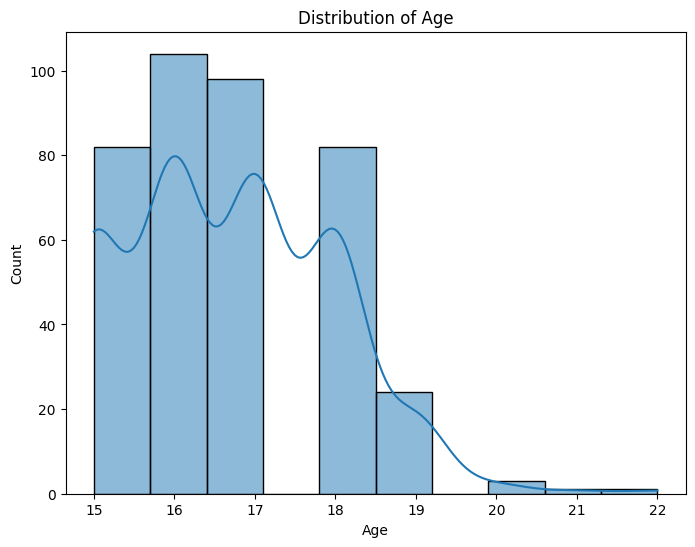

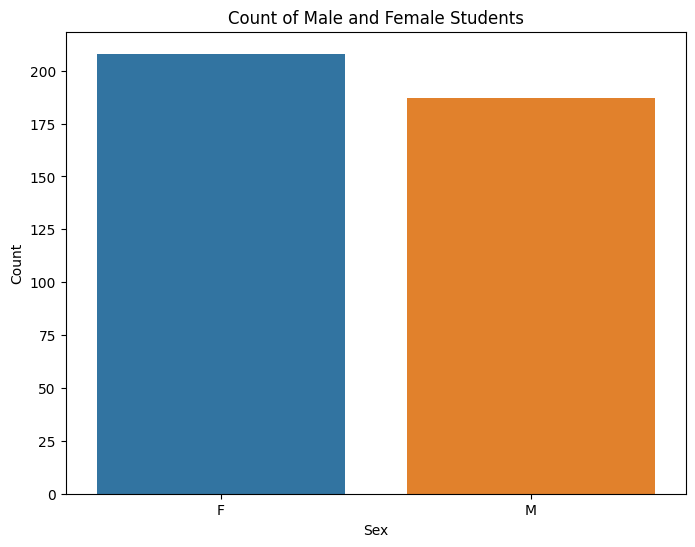

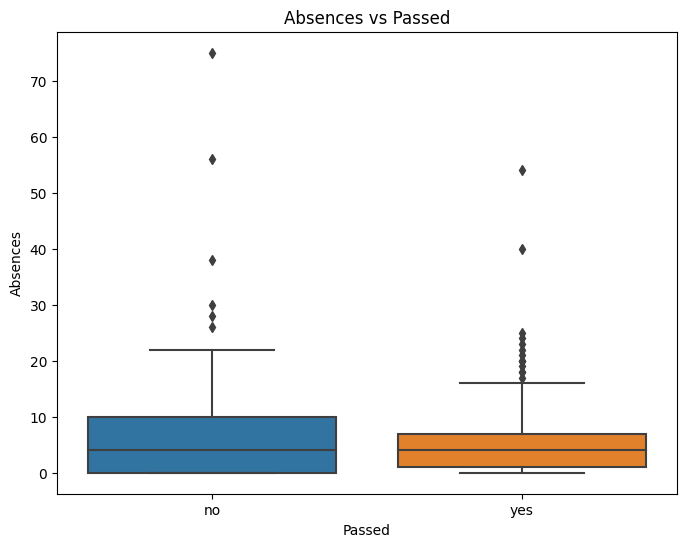

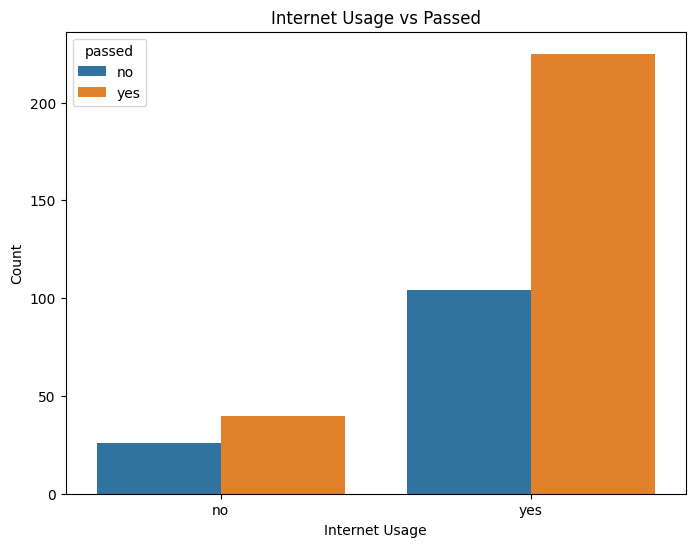

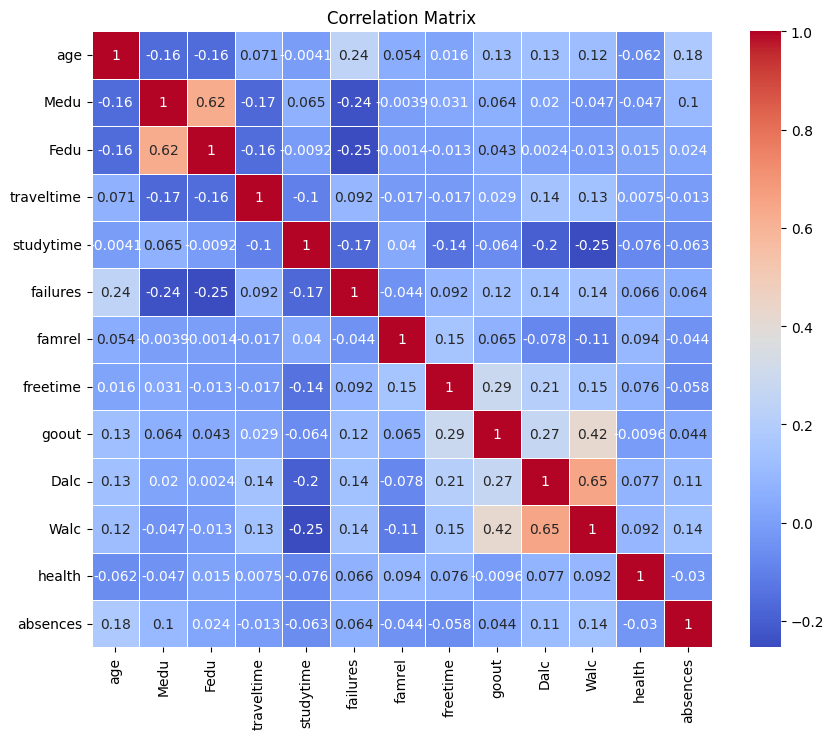

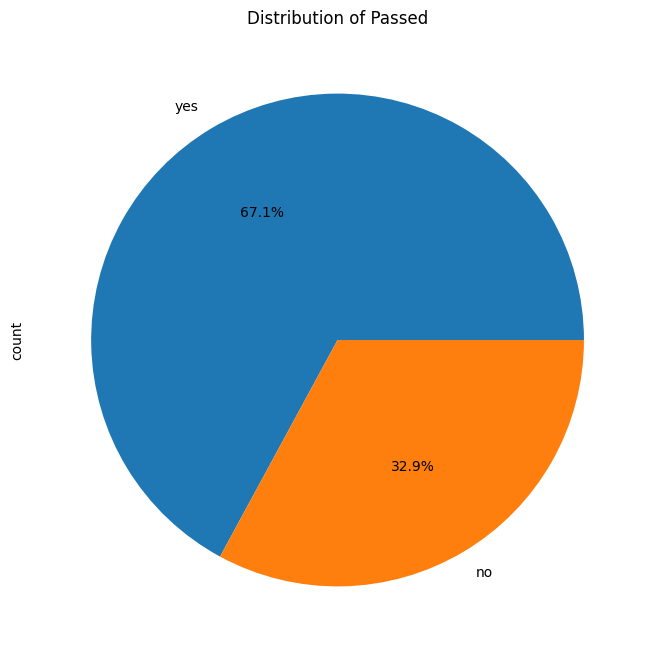

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ploting(df=student_data ,no_passed=False):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['age'], kde=True, bins=10)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    
    # Bar plot for the 'sex' column
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sex')
    plt.title('Count of Male and Female Students')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

    if not no_passed:
        # Bivariate Analysis
        # Box plot for 'absences' vs 'passed'
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x='passed', y='absences')
        plt.title('Absences vs Passed')
        plt.xlabel('Passed')
        plt.ylabel('Absences')
        plt.show()
        
        # Count plot for 'internet' based on 'passed'
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x='internet', hue='passed')
        plt.title('Internet Usage vs Passed')
        plt.xlabel('Internet Usage')
        plt.ylabel('Count')
        plt.show()
        
    # Correlation Analysis
    # Correlation matrix
    
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numeric_columns].corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()
    
    if not no_passed:
        # Target Variable Distribution
        # Pie chart for the distribution of 'passed'
        plt.figure(figsize=(8, 8))
        df['passed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Distribution of Passed')
        plt.show()
ploting()

<div style="margin-left: 10px;font-size:25px">
  <p>  
b) Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
    </p>
    <ul>
        <li>The total number of students, n_students.</li>
        <li>The total number of features for each student, n_features.</li>
        <li>The number of those students who passed, n_passed.</li>
        <li>The number of those students who failed, n_failed.</li>
        <li>The graduation rate of the class, grad_rate, in percent (%).</li>
     </ul>

</div>

In [8]:
student_data.passed[(student_data.passed=='yes')].count()

265

In [9]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1 # 

# TODO: Calculate passing students
n_passed = student_data.passed[(student_data.passed=='yes')].count()

# TODO: Calculate failing students
n_failed = student_data.passed[(student_data.passed=='no')].count()

# TODO: Calculate graduation rate
grad_rate = n_passed / n_students

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


<div style="margin-left: 10px;font-size:25px">
    <p>c) Preparing the Data</p>
    <p>In this section, we will prepare the data for modeling, training and testing.</p>
    <p>Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.</p>
</div>




In [10]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X = student_data[feature_cols]
y = student_data[target_col]

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


<div style="margin-left: 10px;font-size:25px">
    <p>d) Preprocess Feature Columns</p>
    <p>As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.</p>
    <p>
Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.</p>
</div>


In [11]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is non-numeric, replace all binary values with 1/0
        if col_data.dtype == object and len(col_data.unique()) == 2:
            print("*****binary*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            col_data = col_data.replace(col_data_unique, [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object and len(col_data.unique()) != 2:
            print("*****categorical*****")
            print("col name: ", col, end="----")
            col_data_unique = col_data.unique()
            print("unique values: ", col_data_unique)
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_preprocessed = preprocess_features(X)

*****binary*****
col name:  school----unique values:  ['GP' 'MS']
*****binary*****
col name:  sex----unique values:  ['F' 'M']
*****binary*****
col name:  address----unique values:  ['U' 'R']
*****binary*****
col name:  famsize----unique values:  ['GT3' 'LE3']
*****binary*****
col name:  Pstatus----unique values:  ['A' 'T']
*****categorical*****
col name:  Mjob----unique values:  ['at_home' 'health' 'other' 'services' 'teacher']
*****categorical*****
col name:  Fjob----unique values:  ['teacher' 'other' 'services' 'health' 'at_home']
*****categorical*****
col name:  reason----unique values:  ['course' 'other' 'home' 'reputation']
*****categorical*****
col name:  guardian----unique values:  ['mother' 'father' 'other']
*****binary*****
col name:  schoolsup----unique values:  ['yes' 'no']
*****binary*****
col name:  famsup----unique values:  ['no' 'yes']
*****binary*****
col name:  paid----unique values:  ['no' 'yes']
*****binary*****
col name:  activities----unique values:  ['no' 'yes']


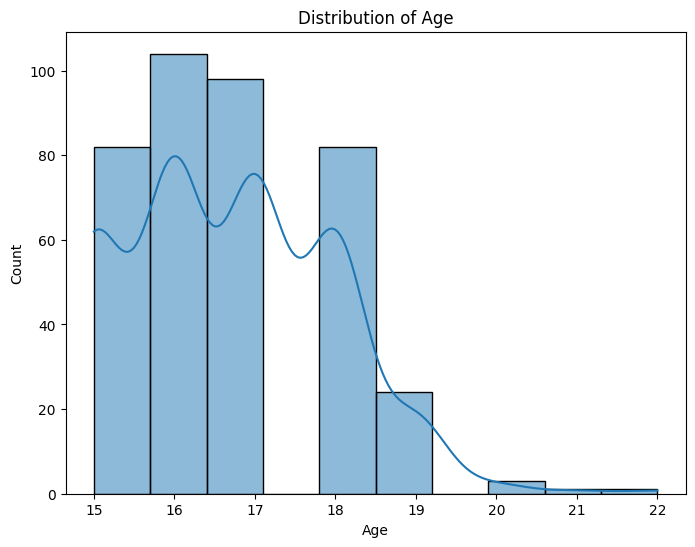

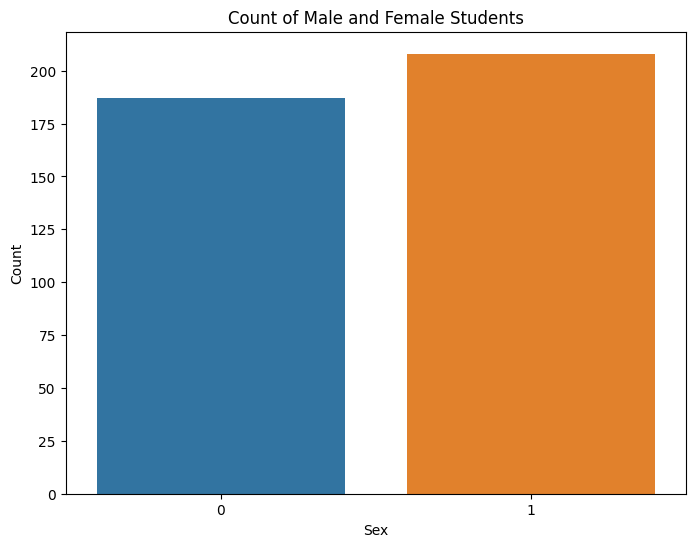

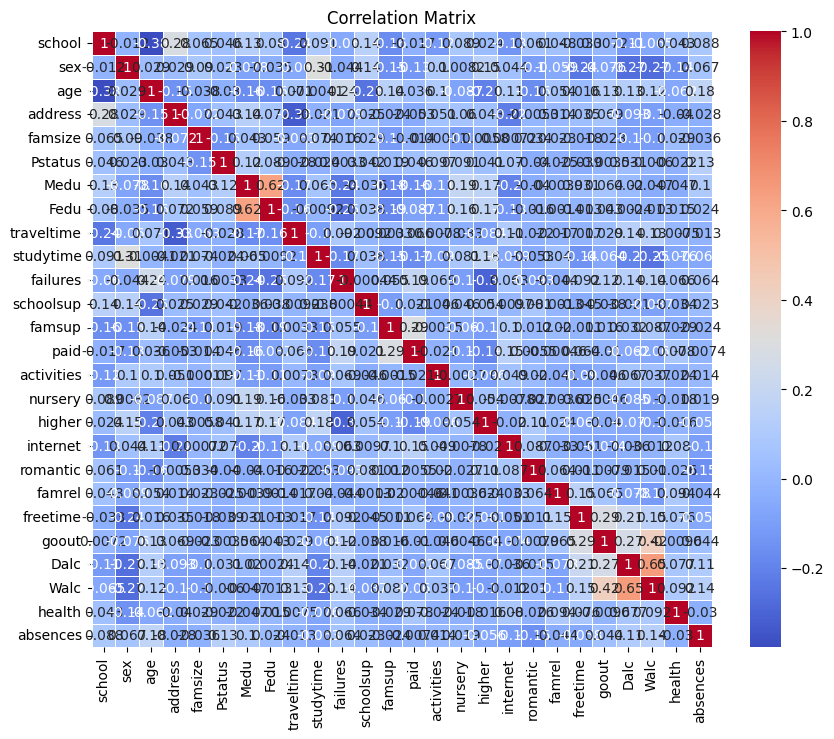

In [12]:
ploting(X_preprocessed,no_passed=True)

<div style="margin-left: 10px;font-size:25px">
    <p>e) Training and Testing Data Split</p>
    <p>split the data (both features and corresponding labels) into training and test sets.(Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).)</p>
</div>

In [13]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
# X = X_preprocessed.drop(['passed'],axis=1)
# y = student_data.passed
# TODO: split the dataset into the number of training and testing
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,random_state=42)

X_test = X_test
y_train = y_train
y_test = y_test

<div style="margin-left: 10px;font-size:25px">
<p>f) In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to training data and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.</p>
<p>The following supervised learning models are currently available in scikit-learn that you may choose from:</p>
    <ul>
        <li>Gaussian Naive Bayes (GaussianNB)</li>
        <li>K-Nearest Neighbors (KNeighbors)</li>
        <li>Stochastic Gradient Descent (SGDC)</li>
        <li>Support Vector Machines (SVM)</li>
        <li>Logistic Regression</li>
     </ul>
</div>    

### Gaussian Naive Bayes (GaussianNB):

#### Strengths:
- It is a simple and fast algorithm that works well with high-dimensional datasets. It performs well when the features are independent or conditionally independent given the target variable.
#### Weaknesses:
- It assumes that features are independent, which may not hold true in some real-world scenarios. It may not be suitable for datasets with complex relationships between features.
#### Suitability:
- GaussianNB is often used for text classification, spam filtering, and other similar tasks where feature independence assumptions are reasonable.

### K-Nearest Neighbors (KNeighbors):

#### Strengths:
- KNeighbors is a non-parametric algorithm that can handle complex decision boundaries. It is easy to understand and implement. It works well with small to medium-sized datasets.
#### Weaknesses:
- It can be computationally expensive as the number of training samples and dimensions increase. It requires careful selection of the value for the "k" parameter.
#### Suitability:
- KNeighbors is suitable for classification tasks where local patterns and relationships are important. It can be effective when the data has clear clusters or regions with different classes.

### Stochastic Gradient Descent (SGD):

#### Strengths:
 - SGD is efficient and performs well on large-scale datasets. It supports various loss functions and can handle partial fitting, making it suitable for online learning scenarios.
#### Weaknesses:
- It may require careful tuning of hyperparameters, such as the learning rate and regularization, for optimal performance. It may be sensitive to feature scaling.
#### Suitability:
- SGD is often used for linear models and large-scale classification tasks. It can handle sparse data and is suitable for scenarios where efficiency and scalability are important.

### Support Vector Machines (SVM):

#### Strengths:
- SVMs can handle complex decision boundaries and are effective in high-dimensional spaces. They can handle both linear and non-linear classification tasks using different kernel functions.
####  Weaknesses:
- SVMs can be computationally expensive, especially for large datasets. They may require careful tuning of hyperparameters, such as the kernel type and regularization parameter.
#### Suitability:
- SVMs are suitable for binary and multi-class classification tasks. They are often used in scenarios where finding the optimal decision boundary is crucial.

### Logistic Regression:

#### Strengths: 
- Logistic regression is a simple and interpretable algorithm. It performs well with linearly separable data and can handle both binary and multi-class classification tasks.
#### Weaknesses: 
- It may not perform well when the data has complex relationships or nonlinear decision boundaries. It is sensitive to outliers and may require feature engineering for optimal performance.
#### Suitability:
- Logistic regression is commonly used in various applications, including medical diagnostics, marketing, and social sciences, where interpretability and simplicity are desired.

In [21]:
from datetime import datetime 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier


### GaussianNB

In [22]:
nb_model = GaussianNB()
t0 = datetime.now()
nb_model.fit(X_train,y_train)
t1 = datetime.now() 
y_predict = nb_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict))

print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       0.62      0.36      0.46        36
         yes       0.71      0.87      0.78        63

    accuracy                           0.69        99
   macro avg       0.66      0.62      0.62        99
weighted avg       0.67      0.69      0.66        99

fit time duration:  0:00:00.008788
predict time duration:  0:00:00.003259


In [23]:
BernoulliNB
nb_model = BernoulliNB()
t0 = datetime.now()
nb_model.fit(X_train, y_train)
t1 = datetime.now()
y_predict = nb_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict))


print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       0.63      0.33      0.44        36
         yes       0.70      0.89      0.78        63

    accuracy                           0.69        99
   macro avg       0.67      0.61      0.61        99
weighted avg       0.68      0.69      0.66        99

fit time duration:  0:00:00.011029
predict time duration:  0:00:00.004692


### KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier()
t0 = datetime.now()
knn_model.fit(X_train,y_train)
t1 = datetime.now()
y_predict = knn_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict))


print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       0.59      0.28      0.38        36
         yes       0.68      0.89      0.77        63

    accuracy                           0.67        99
   macro avg       0.64      0.58      0.57        99
weighted avg       0.65      0.67      0.63        99

fit time duration:  0:00:00.006029
predict time duration:  0:00:00.009856


### SGDRegressorsor

In [25]:
sg_model = SGDClassifier()
t0 = datetime.now()
sg_model.fit(X_train,y_train)
t1 = datetime.now()
y_predict = sg_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict))

print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       0.50      0.03      0.05        36
         yes       0.64      0.98      0.77        63

    accuracy                           0.64        99
   macro avg       0.57      0.51      0.41        99
weighted avg       0.59      0.64      0.51        99

fit time duration:  0:00:00.003681
predict time duration:  0:00:00.001418


### SVC

In [26]:
svc_model = SVC()
t0 = datetime.now()
svc_model.fit(X_train,y_train)
t1 = datetime.now()
y_predict = svc_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict, zero_division=1))


print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       1.00      0.00      0.00        36
         yes       0.64      1.00      0.78        63

    accuracy                           0.64        99
   macro avg       0.82      0.50      0.39        99
weighted avg       0.77      0.64      0.49        99

fit time duration:  0:00:00.013445
predict time duration:  0:00:00.003349


### LogisticRegression

In [27]:
lg_model = LogisticRegression()
t0 = datetime.now()
lg_model.fit(X_train,y_train)
t1 = datetime.now()
y_predict = lg_model.predict(X_test)
t2 = datetime.now()
print(metrics.classification_report(y_test,y_predict, zero_division=1))


print("fit time duration: ", t1-t0 )
print("predict time duration: ", t2-t1 )

              precision    recall  f1-score   support

          no       0.67      0.33      0.44        36
         yes       0.70      0.90      0.79        63

    accuracy                           0.70        99
   macro avg       0.69      0.62      0.62        99
weighted avg       0.69      0.70      0.67        99

fit time duration:  0:00:00.082024
predict time duration:  0:00:00.002221


/home/rahmani/work/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import time

In [68]:
models = [
    ("Gaussian Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC()),
    ("SGDClassifier", SGDClassifier()),
    ("BernoulliNB", BernoulliNB()),

]

results = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    start_time = time.time()
    _ = model.predict(X_test)  
    prediction_time = time.time() - start_time
    
    train_score = metrics.classification_report(y_train, model.predict(X_train),zero_division=1,output_dict=True)

    test_score = metrics.classification_report(y_test, model.predict(X_test),zero_division=1,output_dict=True)
     
    result = {
        "Model": name,
        "Training Set Size": len(X_train),
        "Training Time": training_time,
        "Prediction Time": prediction_time,
    
        "F1 Score (Training)": train_score['yes']['f1-score'],
        "F1 Score (Testing)": test_score['yes']['f1-score'],

        
        "Recall (Training)": train_score['yes']['recall'],
        "Recall (Testing)": test_score['yes']['recall'],

        "Accuracy (train)":train_score['accuracy'],
        "Accuracy (Testing)": test_score['accuracy'],
    }
    
    results.append(result)


/home/rahmani/work/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
pd.DataFrame(results)

,Model,Training Set Size,Training Time,Prediction Time,F1 Score (Training),F1 Score (Testing),Recall (Training),Recall (Testing),Accuracy (train),Accuracy (Testing)
0,Gaussian Naive Bayes,296,0.003201,0.001825,0.809524,0.780142,0.841584,0.873016,0.729730,0.686869
1,K-Nearest Neighbors,296,0.001812,0.008068,0.868182,0.772414,0.945545,0.888889,0.804054,0.666667
2,Logistic Regression,296,0.013614,0.001814,0.840909,0.791667,0.915842,0.904762,0.763514,0.696970
3,SVC,296,0.006690,0.003678,0.812877,0.777778,1.000000,1.000000,0.685811,0.636364
4,SGDClassifier,296,0.003810,0.001676,0.848352,0.789116,0.955446,0.920635,0.766892,0.686869
5,BernoulliNB,296,0.003006,0.001887,0.810185,0.783217,0.866337,0.888889,0.722973,0.686869
